In [1]:
import tkinter as tk
from tkinter import messagebox
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os




In [2]:
class BMICALCULATORAPP:
    def __init__(self, root):
        self.root = root
        self.root.title("BMI CALCULATOR WITH HISTORY AND TREND")
        self.root.geometry("500x500")
        self.root.configure(bg="#e6f2ff")  # Soft blue background

        self.history_file = "bmi_history.csv"
        if os.path.exists(self.history_file):
            self.history = pd.read_csv(self.history_file)
        else:
            self.history = pd.DataFrame(columns=["Date", "Weight (Kg)", "Height(cm)", "BMI"])

        self.create_widgets()

    def create_widgets(self):
        label_font = ("Helvetica", 12, "bold")
        entry_font = ("Helvetica", 11)
        button_bg = "#4da6ff"  # Medium blue
        button_fg = "white"  # White text

        # Weight input
        tk.Label(self.root, text="WEIGHT (KG):", font=label_font, bg="#e6f2ff").grid(row=0, column=0, padx=10, pady=10, sticky="e")
        self.weight_entry = tk.Entry(self.root, width=20, font=entry_font, bg="white")
        self.weight_entry.grid(row=0, column=1, pady=10)

        # Height input
        tk.Label(self.root, text="HEIGHT (CM):", font=label_font, bg="#e6f2ff").grid(row=1, column=0, padx=10, pady=10, sticky="e")
        self.height_entry = tk.Entry(self.root, width=20, font=entry_font, bg="white")
        self.height_entry.grid(row=1, column=1, pady=10)

        # Calculate BMI Button
        tk.Button(self.root, text="CALCULATE BMI", command=self.calculate_bmi,
                  font=label_font, bg=button_bg, fg=button_fg).grid(
            row=2, column=0, columnspan=2, pady=15
        )

        # History and Trend buttons
        tk.Button(self.root, text="SHOW HISTORY", command=self.show_history,
                  font=label_font, bg=button_bg, fg=button_fg).grid(
            row=3, column=0, padx=10, pady=5
        )
        tk.Button(self.root, text="PLOT TREND", command=self.plot_trends,
                  font=label_font, bg=button_bg, fg=button_fg).grid(
            row=3, column=1, padx=10, pady=5
        )

        # BMI Result Label
        self.result_label = tk.Label(self.root, text="BMI: --", font=("Helvetica", 13, "bold"), bg="#e6f2ff")
        self.result_label.grid(row=4, column=0, columnspan=2, pady=20)

    def calculate_bmi(self):
        weight = self.weight_entry.get()
        height = self.height_entry.get()

        if not weight or not height:
            messagebox.showerror("INPUT ERROR", "Please enter both weight and height.")
            return

        try:
            weight = float(weight)
            height = float(height) / 100  # Convert cm to meters
        except ValueError:
            messagebox.showerror("INPUT ERROR", "Please enter valid numeric values.")
            return

        bmi = weight / (height ** 2)

        # Determine BMI category
        if bmi < 18.5:
            category = "Underweight"
        elif 18.5 <= bmi < 24.9:
            category = "Normal weight"
        elif 25 <= bmi < 29.9:
            category = "Overweight"
        else:
            category = "Obese"

        self.result_label.config(text=f"BMI: {bmi:.2f} ({category})")
        self.save_history(weight, height * 100, bmi)

    def save_history(self, weight, height, bmi):
        current_time = datetime.now().strftime("%Y-%m-%d %H:%M:%S")
        new_row = pd.DataFrame([{
            "Date": current_time,
            "Weight (Kg)": weight,
            "Height(cm)": height,
            "BMI": bmi
        }])
        self.history = pd.concat([self.history, new_row], ignore_index=True)
        self.history.to_csv(self.history_file, index=False)

    def show_history(self):
        try:
            self.history = pd.read_csv(self.history_file)
            if self.history.empty:
                messagebox.showinfo("BMI HISTORY", "No history available.")
                return
            history_text = self.history.to_string(index=False)
            messagebox.showinfo("BMI HISTORY", history_text)
        except Exception as e:
            messagebox.showerror("ERROR", f"Unable to read history.\n{e}")

    def plot_trends(self):
        try:
            self.history = pd.read_csv(self.history_file)
            if self.history.empty:
                messagebox.showinfo("BMI TREND", "No data to plot.")
                return

            plot_window = tk.Toplevel(self.root)
            plot_window.title("BMI Trend Plot")
            plot_window.geometry("500x300")  # Smaller plot window

            fig, ax = plt.subplots(figsize=(5, 2.5))
            ax.plot(pd.to_datetime(self.history["Date"]), self.history["BMI"],
                    marker='o', linestyle='-', color='blue')
            ax.set_title("BMI Trend Over Time")
            ax.set_xlabel("Date")
            ax.set_ylabel("BMI")
            ax.grid(True)
            fig.autofmt_xdate()

            canvas = FigureCanvasTkAgg(fig, master=plot_window)
            canvas.draw()
            canvas.get_tk_widget().pack()

        except Exception as e:
            messagebox.showerror("ERROR", f"Unable to plot trend.\n{e}")


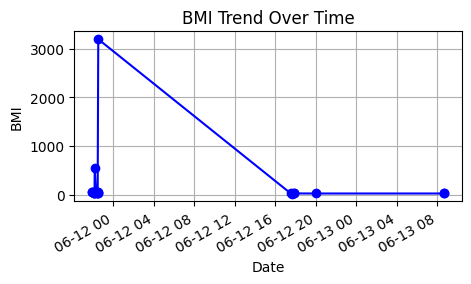

In [3]:
# Start the application
if __name__ == "__main__":
    root = tk.Tk()
    app = BMICALCULATORAPP(root)
    root.mainloop()